# **Determining the Effect of Income Level on NCAA Game Performance**

## **Team 1**


Archit Agarwal, 
Itthiphat Laokwansatit,
Karl Kue, 
Rajeshwar Kothakapu,
Somesh Yechury, 
Sushil Sasheendran,


## **1. Project Proposal**


Our objective is to analyze the effect of the environment, described as income level of the zip code, on the performance of NCAA basketball teams. We will analyze zip code rental price data and game performance to see if there is a correlation. Rental price data is used as a proxy for income level of the zip code. To achieve our objective we will use data from NCAA basketball conferences and fair market rent data. Our analysis will include testing several hypothesis using analytics tools on Python. Hypothesis will either be Validated, Invalidated or Requires More Information. Key takeaways from our analysis will be provided under each plot and overall conclusion summarized at the end of the report.

## **2. Data Source and Description**

### 2.1. NCAA Game Data

NCAA game data from 1894 to 2018 is available at the NCAA [website](https://www.ncaa.org/). The data is compiled in [Google Cloud BigQuery](https://console.cloud.google.com/marketplace/product/ncaa-bb-public/ncaa-basketball).

There are two datasets relevant to our project:
*   **ncaa_basketball.mbb_games_sr**: 29,802 records, 132 variables (incl. ID).

    This dataset contains team stats for every men's basketball game from the 2013-14 season to the 2017-18 season. Each row shows both teams' stats for that one game.

*   **ncaa_basketball.mbb_teams**: 351 records, 28 variables (incl. ID).

    This dataset contains general information about the 351 basketball teams. Each row shows stats for a team.


The schema information is available in [Google Cloud BigQuery](https://console.cloud.google.com/marketplace/product/ncaa-bb-public/ncaa-basketball). A truncated sample of the schema for **ncaa_basketball.mbb_games_sr** is shown in the next cell.

Field name | Type | Mode | Collation | Policy Tags | Description	
--- | --- | --- | --- | --- | --- 	
game_id | STRING|NULLABLE|||[Game data] Unique identifier for the game	
season|INTEGER|NULLABLE|||[Game data] Season the game was played in	
status|STRING|NULLABLE|||[Game data] Indicates the last state of Sportradar's game file
coverage|STRING|NULLABLE|||[Game data] Type of coverage provided by Sportradar
...|...|...|...|...|...

### 2.2. Fair Market Rent Data

Rent price data is published every year by the Department of Housing and Urban Development (HUD) on their [website](https://www.huduser.gov/portal/home.html).

For this project, we use the latest [data set](https://www.huduser.gov/portal/datasets/fmr.html#2022_data) available for the 40th percentile of rent prices for 2022.

*   **fy2022_erap_fmrs_revised**: 29,283 records, 8 variables (incl. ID).

    This dataset contains the 40th percentile of rent prices for each housing type. Each row shows stats for a zip code or a sub-area if a zip code has multiple areas.

    The schema for this dataset is shown in the next cell.

Variable | Definition
--- | ---
HUD Metro Fair Market Rent Area Name|Area name as defined by the HUD
CBSASub22|ID used by the HUD for each area
Zip Code|Zip code of the area
erap_fmr_br0|40th percentile of rent prices for studios in the area or zip code (whichever is smaller)
erap_fmr_br1|40th percentile of rent prices for 1-bedroom in the area or zip code (whichever is smaller)
erap_fmr_br2|40th percentile of rent prices for 2-bedroom in the area or zip code (whichever is smaller)
erap_fmr_br3|40th percentile of rent prices for 3-bedroom in the area or zip code (whichever is smaller)
erap_fmr_br4|40th percentile of rent prices for 4-bedroom in the area or zip code (whichever is smaller)

## **3. Importing Modules and Data**

In [ ]:
# Modules for loading data
from google.colab import drive

# Modules for manipulating data
import pandas as pd
import numpy as np

# Modules for analytics
from scipy.stats import pearsonr

# Module for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mounting Google Drive and loading files to data frames

drive.mount('/content/drive/')

teams_df = pd.read_csv('drive/Shareddrives/IS833_Team3/ncaa_basketball.mbb_teams.csv')
games_df = pd.read_csv('drive/Shareddrives/IS833_Team3/ncaa_basketball.mbb_games_sr.csv')
rent_df = pd.read_csv('drive/Shareddrives/IS833_Team3/fy2022_erap_fmrs_revised.csv')

Mounted at /content/drive/


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,7,16,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## **4. EDA and Data Cleaning**

### 4.1. Exploring team data

We are interested in the zip code of the team so we can connect rent information for each team.

In [ ]:
teams_df.head()

,market,alias,name,id,code_ncaa,kaggle_team_id,school_ncaa,turner_name,league_name,league_alias,...,venue_city,venue_state,venue_address,venue_zip,venue_country,venue_name,venue_capacity,logo_large,logo_medium,logo_small
0,Princeton,PRIN,Tigers,fe406882-9f22-495e-9df6-ef357a6803c6,554,1343,Princeton,Princeton University,NCAA MEN,NCAAM,...,Princeton,NJ,Princeton University,8542.0,USA,Jadwin Gymnasium,6854,https://www.ncaa.com/sites/default/files/image...,https://www.ncaa.com/sites/default/files/image...,https://www.ncaa.com/sites/default/files/image...
1,Yale,YALE,Bulldogs,ca478771-aa3d-4231-81e0-b70f519134fb,813,1463,Yale,Yale University,NCAA MEN,NCAAM,...,New Haven,CT,70 Tower Pkwy,6511.0,USA,John J. Lee Amphitheater,2532,https://www.ncaa.com/sites/default/files/image...,https://www.ncaa.com/sites/default/files/image...,https://www.ncaa.com/sites/default/files/image...
2,Harvard,HARV,Crimson,5c7bf63f-bc39-43c5-9907-73b50b7a6b34,275,1217,Harvard,Harvard University,NCAA MEN,NCAAM,...,Allston,MA,Soldiers Field Road,2163.0,USA,Lavietes Pavilion,2195,https://www.ncaa.com/sites/default/files/image...,https://www.ncaa.com/sites/default/files/image...,https://www.ncaa.com/sites/default/files/image...
3,Dartmouth,DART,Big Green,d60357bd-1205-42e9-9092-d986a2843a34,172,1171,Dartmouth,Dartmouth College,NCAA MEN,NCAAM,...,Hanover,NH,6 South Park Street,3755.0,USA,Edward Leede Arena,2100,https://www.ncaa.com/sites/default/files/image...,https://www.ncaa.com/sites/default/files/image...,https://www.ncaa.com/sites/default/files/image...
4,Cornell,COR,Big Red,88ff8c00-958e-4ccf-a21d-77fab9e93692,167,1165,Cornell,Cornell University,NCAA MEN,NCAAM,...,Ithaca,NY,Bartels Hall,14853.0,USA,Newman Arena,4473,https://www.ncaa.com/sites/default/files/image...,https://www.ncaa.com/sites/default/files/image...,https://www.ncaa.com/sites/default/files/image...


In [ ]:
teams_df.shape

(351, 28)

In [ ]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   market          351 non-null    object 
 1   alias           351 non-null    object 
 2   name            351 non-null    object 
 3   id              351 non-null    object 
 4   code_ncaa       351 non-null    int64  
 5   kaggle_team_id  351 non-null    int64  
 6   school_ncaa     351 non-null    object 
 7   turner_name     351 non-null    object 
 8   league_name     351 non-null    object 
 9   league_alias    351 non-null    object 
 10  league_id       351 non-null    object 
 11  conf_name       351 non-null    object 
 12  conf_alias      351 non-null    object 
 13  conf_id         351 non-null    object 
 14  division_name   351 non-null    object 
 15  division_alias  351 non-null    object 
 16  division_id     351 non-null    object 
 17  venue_id        351 non-null    obj

In [ ]:
teams_df.isnull().sum()

market            0
alias             0
name              0
id                0
code_ncaa         0
kaggle_team_id    0
school_ncaa       0
turner_name       0
league_name       0
league_alias      0
league_id         0
conf_name         0
conf_alias        0
conf_id           0
division_name     0
division_alias    0
division_id       0
venue_id          0
venue_city        0
venue_state       0
venue_address     4
venue_zip         1
venue_country     0
venue_name        0
venue_capacity    0
logo_large        0
logo_medium       0
logo_small        0
dtype: int64

Since we need to a zip code for each team to connect the rent data, we need to fill in the 1 null value.

In [ ]:
# find the row with missing zip data

teams_df[teams_df['venue_zip'].isna()]

,market,alias,name,id,code_ncaa,kaggle_team_id,school_ncaa,turner_name,league_name,league_alias,...,venue_city,venue_state,venue_address,venue_zip,venue_country,venue_name,venue_capacity,logo_large,logo_medium,logo_small
135,Abilene Christian,AC,Wildcats,a52b2ece-1f87-45b5-ae1e-8d0920479965,2,1101,Abilene Christian,Abilene Christian University,NCAA MEN,NCAAM,...,Abilene,TX,NaN,NaN,USA,Moody Coliseum (Abilene),4600,https://www.ncaa.com/sites/default/files/image...,https://www.ncaa.com/sites/default/files/image...,https://www.ncaa.com/sites/default/files/image...


In [ ]:
# we fill in the missing value manually using information from Google

teams_df.loc[135, 'venue_zip'] = 79699

In [ ]:
# since zip codes are integers, we check if there are any values that are inconsistent

(teams_df['venue_zip'] == teams_df['venue_zip'].astype('int64', errors='raise')).value_counts()

True    351
Name: venue_zip, dtype: int64

In [ ]:
# We can safely cast the data to 'int64'

teams_df['venue_zip'] = teams_df['venue_zip'].astype('int64', errors='raise')

### 4.2. Exploring rent price data

Since we are connecting the team data using zip code, we have to check the data sanity of the zip code and rent price column. We limit our analysis to the 1-bedroom rent prices.

In [ ]:
rent_df.head()

,HUD Fair Market Rent Area Name,CBSASub22,ZIP\nCode,erap_fmr_br0,erap_fmr_br1,erap_fmr_br2,erap_fmr_br3,erap_fmr_br4
0,"Abilene, TX MSA",METRO10180M10180,76437,$688,$732,$945,"$1,288","$1,598"
1,"Abilene, TX MSA",METRO10180M10180,76443,$688,$732,$945,"$1,288","$1,598"
2,"Abilene, TX MSA",METRO10180M10180,76464,$688,$732,$945,"$1,288","$1,598"
3,"Abilene, TX MSA",METRO10180M10180,76469,$688,$732,$945,"$1,288","$1,598"
4,"Abilene, TX MSA",METRO10180M10180,79501,$688,$732,$945,"$1,288","$1,598"


In [ ]:
rent_df.shape

(29283, 8)

In [ ]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29283 entries, 0 to 29282
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   HUD Fair Market Rent Area Name  29283 non-null  object
 1   CBSASub22                       29283 non-null  object
 2   ZIP
Code                        29283 non-null  int64 
 3   erap_fmr_br0                    29283 non-null  object
 4   erap_fmr_br1                    29283 non-null  object
 5   erap_fmr_br2                    29283 non-null  object
 6   erap_fmr_br3                    29283 non-null  object
 7   erap_fmr_br4                    29283 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.8+ MB


In [ ]:
rent_df.isnull().sum()

HUD Fair Market Rent Area Name    0
CBSASub22                         0
ZIP\nCode                         0
erap_fmr_br0                      0
erap_fmr_br1                      0
erap_fmr_br2                      0
erap_fmr_br3                      0
erap_fmr_br4                      0
dtype: int64

The rent prices for 1-bedroom are "object" type. We want to convert this to a number.

We create a new column called "rent" which is the cleaned version of the 1-bedroom rent data.

In [ ]:
# cleaning rent prices for 0 bedroom by removing any non-digit characters
rent_df['rent'] = rent_df['erap_fmr_br0'].str.replace('$', '')
rent_df['rent'] = rent_df['rent'].str.replace(',', '').astype(int)

# if a zip code has multiple areas, it will have multiple entries
# we aggregate data by zip code and take the mean of the areas in the zip code
zip_rent_price_df = rent_df.groupby('ZIP\nCode').agg({'rent' : 'mean'})

# checking for any data loss; the number of rows should be equal to the number of unique zip codes
print("Checking for data consistency:")
print(len(zip_rent_price_df) == len(rent_df['ZIP\nCode'].unique()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Checking for data consistency:
True


### 4.3. Merging the teams information with the rent information

In [ ]:
# we use an inner join because we only want to analyze teams with rent data
teams_rent_df = teams_df.merge(zip_rent_price_df, right_index=True, left_on='venue_zip', how='inner')

In [ ]:
teams_rent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 350
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   market          299 non-null    object 
 1   alias           299 non-null    object 
 2   name            299 non-null    object 
 3   id              299 non-null    object 
 4   code_ncaa       299 non-null    int64  
 5   kaggle_team_id  299 non-null    int64  
 6   school_ncaa     299 non-null    object 
 7   turner_name     299 non-null    object 
 8   league_name     299 non-null    object 
 9   league_alias    299 non-null    object 
 10  league_id       299 non-null    object 
 11  conf_name       299 non-null    object 
 12  conf_alias      299 non-null    object 
 13  conf_id         299 non-null    object 
 14  division_name   299 non-null    object 
 15  division_alias  299 non-null    object 
 16  division_id     299 non-null    object 
 17  venue_id        299 non-null    obj

In [ ]:
# we drop the irrelevant columns

teams_rent_cols_drop = [5, 25, 26, 27]
teams_rent_df.drop(teams_rent_df.columns[teams_rent_cols_drop], axis=1, inplace=True)

In [ ]:
teams_rent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 350
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   market          299 non-null    object 
 1   alias           299 non-null    object 
 2   name            299 non-null    object 
 3   id              299 non-null    object 
 4   code_ncaa       299 non-null    int64  
 5   school_ncaa     299 non-null    object 
 6   turner_name     299 non-null    object 
 7   league_name     299 non-null    object 
 8   league_alias    299 non-null    object 
 9   league_id       299 non-null    object 
 10  conf_name       299 non-null    object 
 11  conf_alias      299 non-null    object 
 12  conf_id         299 non-null    object 
 13  division_name   299 non-null    object 
 14  division_alias  299 non-null    object 
 15  division_id     299 non-null    object 
 16  venue_id        299 non-null    object 
 17  venue_city      299 non-null    obj

### 4.4. Exploring game information

In [ ]:
games_df.head()

,game_id,season,status,coverage,neutral_site,scheduled_date,gametime,conference_game,tournament,tournament_type,...,a_fast_break_pts,a_second_chance_pts,a_team_turnovers,a_points_off_turnovers,a_team_rebounds,a_flagrant_fouls,a_player_tech_fouls,a_team_tech_fouls,a_coach_tech_fouls,created
0,b4451a02-26c5-4005-9ac8-b06c1f71e661,2015,closed,full,NaN,2015-11-24,2015-11-24 21:30:00 UTC,NaN,NaN,NaN,...,36.0,17.0,0.0,31.0,5.0,0.0,0.0,0.0,0.0,2018-02-20 15:48:58 UTC
1,b2f579ca-9eff-4b2b-a747-81169399c2e8,2015,closed,full,NaN,2015-11-24,2015-11-24 02:00:00 UTC,NaN,NaN,NaN,...,16.0,25.0,0.0,25.0,1.0,0.0,0.0,0.0,0.0,2018-02-20 15:48:53 UTC
2,571be71c-a5bf-446e-bf21-30eb6c54ac5e,2015,closed,full,NaN,2015-11-25,2015-11-25 19:30:00 UTC,NaN,NaN,NaN,...,6.0,6.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,2018-02-20 15:48:58 UTC
3,d6617923-0b23-49e4-af9b-9e4d0243e45c,2015,closed,full,NaN,2015-12-19,2015-12-19 04:00:00 UTC,NaN,NaN,NaN,...,2.0,13.0,1.0,15.0,3.0,0.0,0.0,0.0,0.0,2018-02-20 15:48:53 UTC
4,ffb463a4-dd3c-4ed9-b503-311b95ef0295,2015,closed,full,NaN,2015-12-20,2015-12-20 04:00:00 UTC,NaN,NaN,NaN,...,6.0,7.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,2018-02-20 15:48:53 UTC


In [ ]:
games_df.shape

(29805, 132)

In [ ]:
# we create a new column which is 'True' or 'False' if the home team won the game

games_df['h_win'] = games_df['h_points'] > games_df['a_points']

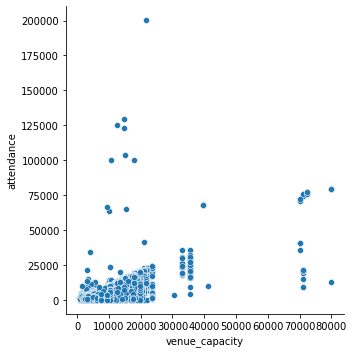

In [ ]:
# we plot the venue capacity of each game against the attendance and see that there are some games where the attendance is significantly higher

sns.relplot(x="venue_capacity", y="attendance", data=games_df)

Figure 1: The plot shows the distribution of attendance vs venue capacity. We can notice that at some games attendance is significantly higher than capacity in some instances.

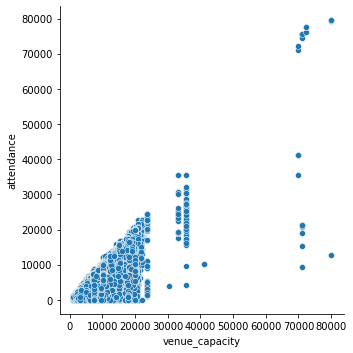

In [ ]:
# since we do not know what the true attendance is for these games,
# when attendance exceeds 120% of venue capacity, we set the attendance to null

games_overcapacity = ~(games_df["venue_capacity"] * 1.2 >= games_df["attendance"])
games_df.loc[games_overcapacity, "attendance"] = None

sns.relplot(x="venue_capacity", y="attendance", data=games_df)

Figure 2: After accounting for the descrepancy in figure 1, we see that there is some loose correlation between attendance and venue capacity.

### 4.5. Merging games data with team-rent information

We want to add three additional columns to the game information

Variable | Definition
--- | ---
venue_rent|40th percentile of rent prices for 1-bedroom in the area or zip code (whichever is smaller) of the location of the game
h_rent|40th percentile of rent prices for 1-bedroom in the area or zip code (whichever is smaller) of the location of the home team
a_rent|40th percentile of rent prices for 1-bedroom in the area or zip code (whichever is smaller) of the location of the away team

In [ ]:
games_rent_df = games_df.merge(
    teams_rent_df[['venue_id', 'rent']], left_on='venue_id', right_on='venue_id',
)
games_rent_df.rename(columns={'rent' : 'venue_rent'}, inplace=True)

In [ ]:
games_rent_df = games_rent_df.merge(
    teams_rent_df[['id', 'rent']], left_on='h_id', right_on='id',
)
games_rent_df.rename(columns={'rent' : 'h_rent'}, inplace=True)

In [ ]:
games_rent_df = games_rent_df.merge(
    teams_rent_df[['id', 'rent']], left_on='a_id', right_on='id',
)
games_rent_df.rename(columns={'rent' : 'a_rent'}, inplace=True)

In [ ]:
games_rent_df.head()

,game_id,season,status,coverage,neutral_site,scheduled_date,gametime,conference_game,tournament,tournament_type,...,a_player_tech_fouls,a_team_tech_fouls,a_coach_tech_fouls,created,h_win,venue_rent,id_x,h_rent,id_y,a_rent
0,267af1b7-9c86-4561-bf63-7a379cdaae6d,2015,closed,full,NaN,2016-03-18,2016-03-18 01:39:00 UTC,NaN,NCAA,South Regional,...,1.0,0.0,0.0,2018-02-20 15:45:32 UTC,False,1150.0,9b166a3f-e64b-4825-bb6b-92c6f0418263,665.0,f38b58de-3273-4723-a78b-2f918e9aa2d5,550.0
1,5f4a9504-eb71-4b13-b41b-a2298c1d370d,2017,closed,full,False,2017-12-02,2017-12-02 19:00:00 UTC,False,NaN,NaN,...,0.0,0.0,0.0,2018-02-20 13:03:23 UTC,False,680.0,db6e1cab-3fa3-4a93-a673-8b2a358ff4bf,680.0,f38b58de-3273-4723-a78b-2f918e9aa2d5,550.0
2,2883c3e5-bc95-4131-a581-ccc12bb7efdc,2015,closed,full,NaN,2016-03-19,2016-03-19 16:10:00 UTC,NaN,NCAA,South Regional,...,0.0,0.0,0.0,2018-02-20 15:45:35 UTC,True,1150.0,7aec5187-cb1b-45e5-8f7d-406d766cdc73,1740.0,f38b58de-3273-4723-a78b-2f918e9aa2d5,550.0
3,5f9eb193-c074-4b39-a432-4f3ee40717de,2017,closed,full,False,2018-02-07,2018-02-07 02:00:00 UTC,True,NaN,NaN,...,0.0,0.0,0.0,2018-02-20 13:03:24 UTC,False,1040.0,1551b3a0-6d10-4ffa-8dfa-73b56f004553,1040.0,f38b58de-3273-4723-a78b-2f918e9aa2d5,550.0
4,1f89b2fc-0d8e-4a18-8142-c30cbb37543e,2014,closed,full,NaN,2014-12-04,2014-12-04 04:00:00 UTC,NaN,NaN,NaN,...,0.0,0.0,0.0,2018-02-20 15:53:40 UTC,True,924.0,0d037a5d-827a-44dd-8b70-57603d671d5d,924.0,f38b58de-3273-4723-a78b-2f918e9aa2d5,550.0


In [ ]:
games_rent_df.shape

(18023, 138)

In [ ]:
print(games_rent_df.columns.tolist())

['game_id', 'season', 'status', 'coverage', 'neutral_site', 'scheduled_date', 'gametime', 'conference_game', 'tournament', 'tournament_type', 'tournament_round', 'tournament_game_no', 'attendance', 'lead_changes', 'times_tied', 'periods', 'possession_arrow', 'venue_id', 'venue_city', 'venue_state', 'venue_address', 'venue_zip', 'venue_country', 'venue_name', 'venue_capacity', 'h_name', 'h_market', 'h_id', 'h_alias', 'h_league_id', 'h_league_name', 'h_league_alias', 'h_conf_id', 'h_conf_name', 'h_conf_alias', 'h_division_id', 'h_division_name', 'h_division_alias', 'h_logo_large', 'h_logo_medium', 'h_logo_small', 'h_points_game', 'h_rank', 'h_minutes', 'h_field_goals_made', 'h_field_goals_att', 'h_field_goals_pct', 'h_three_points_made', 'h_three_points_att', 'h_three_points_pct', 'h_two_points_made', 'h_two_points_att', 'h_two_points_pct', 'h_blocked_att', 'h_free_throws_made', 'h_free_throws_att', 'h_free_throws_pct', 'h_offensive_rebounds', 'h_defensive_rebounds', 'h_rebounds', 'h_ass

## **5. Data Analytics and Hypothesis Testing**
In this section we will try to answer the following question by way of hypothesis testing. Is there a relationship between NCAA basketball game performance and income level?

### 5.1. Impact of income level on the performance of the teams

Hypothesis 1: Teams from higher-income areas have a higher win rate. We hypothesize there could be a series of confounding factors such as quality of training facilities, infrastructure and access to other resources.

In [ ]:
games_rent_df['a_win'] = ~games_rent_df['h_win']

In [ ]:
win_rate_vs_rent_pivot_h = games_rent_df.pivot_table(index=['h_id', 'h_rent'], values='h_win')
win_rate_vs_rent_pivot_h = win_rate_vs_rent_pivot_h.reset_index()

Statistics of plot (slope, p-value): (-0.04706167063588898, 0.41747301069056986)


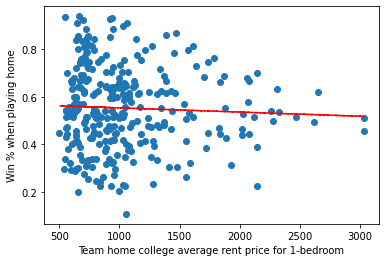

In [ ]:
plt.close()
plt.scatter(x='h_rent', y='h_win', data=win_rate_vs_rent_pivot_h)

z = np.polyfit(x=win_rate_vs_rent_pivot_h['h_rent'], y=win_rate_vs_rent_pivot_h['h_win'], deg=1)
p = np.poly1d(z)

plt.plot(win_rate_vs_rent_pivot_h['h_rent'], p(win_rate_vs_rent_pivot_h['h_rent']), "r--")
plt.xlabel('Team home college average rent price for 1-bedroom')
plt.ylabel('Win % when playing home')

print("Statistics of plot (slope, p-value):", pearsonr(win_rate_vs_rent_pivot_h['h_rent'], win_rate_vs_rent_pivot_h['h_win']))

Figure 3: When teams play at home, we can notice a slight negative slope, however, it is not significant enough to conclude that teams from higher income zip codes have better win percentage. Here we are assuming that the avg rent price is proxy for income level.

In [ ]:
win_rate_vs_rent_pivot_a = games_rent_df.pivot_table(index=['a_id', 'a_rent'], values='a_win')
win_rate_vs_rent_pivot_a = win_rate_vs_rent_pivot_a.reset_index()

win_rate_vs_rent_pivot_a.to_csv('test3.csv')


Statistics of plot (slope, p-value): (0.07230065011372586, 0.2125476835662272)


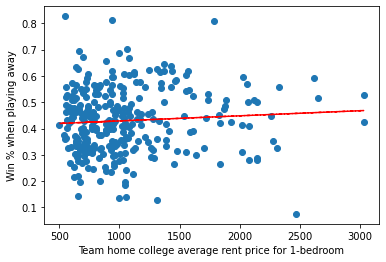

In [ ]:
plt.close()
plt.scatter(x='a_rent', y='a_win', data=win_rate_vs_rent_pivot_a)

z = np.polyfit(x=win_rate_vs_rent_pivot_a['a_rent'], y=win_rate_vs_rent_pivot_a['a_win'], deg=1)
p = np.poly1d(z)

plt.plot(win_rate_vs_rent_pivot_a['a_rent'], p(win_rate_vs_rent_pivot_a['a_rent']), "r--")
plt.xlabel('Team home college average rent price for 1-bedroom')
plt.ylabel('Win % when playing away')

print("Statistics of plot (slope, p-value):", pearsonr(win_rate_vs_rent_pivot_a['a_rent'], win_rate_vs_rent_pivot_a['a_win']))

Figure 4: When teams play away games, we can see a slight positive slope. This is not significant enough to conclude a correlation.

***Hypothesis 1 is invalidated. There is no correlation between income area and win-probability. Addtionally, this is suported by the p-values which are statistically insignificant. Our original hypothesis was based under the assumption that higher income area would mean higher team budgets and therfore higher win%.***



### 5.2. Impact of game venue in higher-income areas and attendance

Hypothesis 2: Games in higher-income areas have higher attendance.

Statistics of plot (slope, p-value): (-0.19513367275272442, 9.403814868585606e-129)


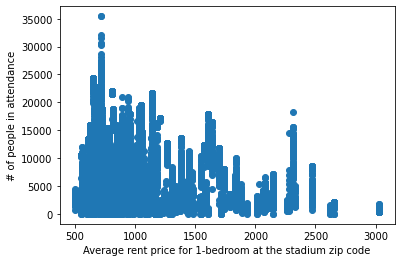

In [ ]:
plt.close()

plt.scatter(x='venue_rent', y='attendance', data=games_rent_df)

z = np.polyfit(x=games_rent_df['venue_rent'], y=games_rent_df['attendance'], deg=1)
p = np.poly1d(z)

plt.plot(games_rent_df['venue_rent'], p(games_rent_df['venue_rent']), 'r')
plt.xlabel('Average rent price for 1-bedroom at the stadium zip code')
plt.ylabel('# of people in attendance')

# ignore 0s and 'None' for statistical analysis

has_attendance_data = (games_rent_df['attendance'] > 0)
print("Statistics of plot (slope, p-value):", pearsonr(games_rent_df.loc[has_attendance_data]['venue_rent'], games_rent_df.loc[has_attendance_data]['attendance']))

Figure 5: It seems there is a declining number of people at attendance for games in higher income areas. We adjust the attendance number to the % the venue is filled to capacity.

Statistics of plot (slope, p-value): (-0.05783506961955108, 1.322146984589083e-12)


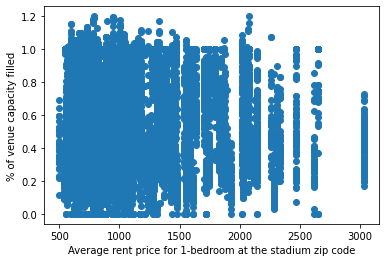

In [ ]:
games_rent_df["filled %"] = games_rent_df['attendance'] / games_rent_df['venue_capacity']

plt.close()

plt.scatter(x='venue_rent', y='filled %', data=games_rent_df)

z = np.polyfit(x=games_rent_df['venue_rent'], y=games_rent_df['filled %'], deg=1)
p = np.poly1d(z)

plt.plot(games_rent_df['venue_rent'], p(games_rent_df['venue_rent']), 'r')
plt.xlabel('Average rent price for 1-bedroom at the stadium zip code')
plt.ylabel('% of venue capacity filled')

print("Statistics of plot (slope, p-value):", pearsonr(games_rent_df.loc[has_attendance_data, 'venue_rent'], games_rent_df.loc[has_attendance_data, 'filled %']))

Figure 6: The data shows that there is a negative correlation between rent prices near the venue and total attendance and % the venues are filled to capacity.

***Hypothesis 2 is invalidated. The above plots suggests that NCAA basketball games are less popular in high-income areas. Our hypothesis was based on the assumption that high-income areas would have high disposable income and therefore would lead to increased attendance at games.***

### 5.3. Impact of team's hometown income level and the number and type of fouls they commit

Hypothesis 3: A correlation exists between a team's hometown income level and the number and type of fouls they commit.

In [ ]:
fouls_vs_rent_h = games_rent_df[['h_id', 'h_flagrant_fouls', 'h_rent']]
fouls_vs_rent_a = games_rent_df[['a_id', 'a_flagrant_fouls', 'a_rent']]

fouls_vs_rent_h.columns = ['id', 'flagrant_fouls', 'rent']
fouls_vs_rent_a.columns = ['id', 'flagrant_fouls', 'rent']

fouls_vs_rent = fouls_vs_rent_h.append(fouls_vs_rent_a)

In [ ]:
fouls_vs_rent = fouls_vs_rent.groupby(['id', 'rent']).agg({'flagrant_fouls' : 'mean'}).reset_index()
fouls_vs_rent.to_csv('fouls_vs_rent.csv')

Statistics of plot (slope, p-value): (0.04713620920401399, 0.4167349799864963)


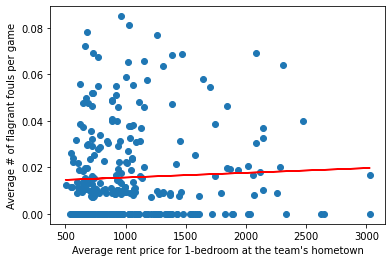

In [ ]:
plt.close()

plt.scatter(x='rent', y='flagrant_fouls', data=fouls_vs_rent)

z = np.polyfit(x=fouls_vs_rent['rent'], y=fouls_vs_rent['flagrant_fouls'], deg=1)
p = np.poly1d(z)

plt.plot(fouls_vs_rent['rent'], p(fouls_vs_rent['rent']), 'r')
plt.xlabel('Average rent price for 1-bedroom at the team\'s hometown')
plt.ylabel('Average # of flagrant fouls per game')

print("Statistics of plot (slope, p-value):", pearsonr(fouls_vs_rent['rent'], fouls_vs_rent['flagrant_fouls']))

Figure 7: There is no correlation between the avg. number of fouls commited per game and hometown income level.

In [ ]:
fouls_vs_rent_h = games_rent_df[['h_id', 'h_personal_fouls', 'h_rent']]
fouls_vs_rent_a = games_rent_df[['a_id', 'a_personal_fouls', 'a_rent']]

fouls_vs_rent_h.columns = ['id', 'personal_fouls', 'rent']
fouls_vs_rent_a.columns = ['id', 'personal_fouls', 'rent']

fouls_vs_rent = fouls_vs_rent_h.append(fouls_vs_rent_a)

In [ ]:
fouls_vs_rent = fouls_vs_rent.groupby(['id', 'rent']).agg({'personal_fouls' : 'mean'}).reset_index()

Statistics of plot (slope, p-value): (0.022418193261945135, 0.699443639569615)


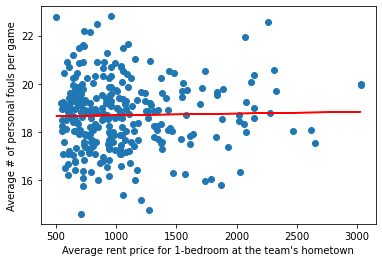

In [ ]:
plt.close()

plt.scatter(x='rent', y='personal_fouls', data=fouls_vs_rent)

z = np.polyfit(x=fouls_vs_rent['rent'], y=fouls_vs_rent['personal_fouls'], deg=1)
p = np.poly1d(z)

plt.plot(fouls_vs_rent['rent'], p(fouls_vs_rent['rent']), 'r')
plt.xlabel('Average rent price for 1-bedroom at the team\'s hometown')
plt.ylabel('Average # of personal fouls per game')

print("Statistics of plot (slope, p-value):", pearsonr(fouls_vs_rent['rent'], fouls_vs_rent['personal_fouls']))

Figure 8: There is no correlation between the avg. number of personal fouls per game to the hometown income level.

***Hypothesis 3 is invalidated. A correlation does not exist between personal and flagrant fouls commited per game and the hometown income level.***

### 5.4. Impact of a rent near team's venue and the number and type of fouls they commit (Personal & Flagrant fouls)


Hypothesis 4: A correlation exists between income level near the venue and the number and number of fouls committed in a game

In [ ]:
fouls_vs_rent_h = games_rent_df[['h_id', 'h_flagrant_fouls', 'venue_rent']]
fouls_vs_rent_a = games_rent_df[['a_id', 'a_flagrant_fouls', 'venue_rent']]

fouls_vs_rent_h.columns = ['id', 'flagrant_fouls', 'rent']
fouls_vs_rent_a.columns = ['id', 'flagrant_fouls', 'rent']

fouls_vs_rent = fouls_vs_rent_h.append(fouls_vs_rent_a)

In [ ]:
fouls_vs_rent = fouls_vs_rent.groupby(['rent']).agg({'flagrant_fouls' : 'mean'}).reset_index()

Statistics of plot (slope, p-value): (0.05859405983743249, 0.4256985776155793)


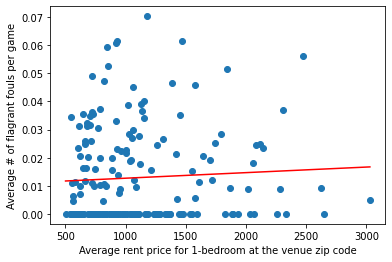

In [ ]:
plt.close()

plt.scatter(x='rent', y='flagrant_fouls', data=fouls_vs_rent)

z = np.polyfit(x=fouls_vs_rent['rent'], y=fouls_vs_rent['flagrant_fouls'], deg=1)
p = np.poly1d(z)

plt.plot(fouls_vs_rent['rent'], p(fouls_vs_rent['rent']), 'r')
plt.xlabel('Average rent price for 1-bedroom at the venue zip code')
plt.ylabel('Average # of flagrant fouls per game')

print("Statistics of plot (slope, p-value):", pearsonr(fouls_vs_rent['rent'], fouls_vs_rent['flagrant_fouls']))

Figure 9: There is no correlation between the avg. number of flagrant fouls committed per game and income level in the venue's zip code.

In [ ]:
fouls_vs_rent_h = games_rent_df[['h_id', 'h_personal_fouls', 'venue_rent']]
fouls_vs_rent_a = games_rent_df[['a_id', 'a_personal_fouls', 'venue_rent']]

fouls_vs_rent_h.columns = ['id', 'personal_fouls', 'rent']
fouls_vs_rent_a.columns = ['id', 'personal_fouls', 'rent']

fouls_vs_rent = fouls_vs_rent_h.append(fouls_vs_rent_a)

In [ ]:
fouls_vs_rent = fouls_vs_rent.groupby(['rent']).agg({'personal_fouls' : 'mean'}).reset_index()

Statistics of plot (slope, p-value): (-0.055343101110048074, 0.4518659468815112)


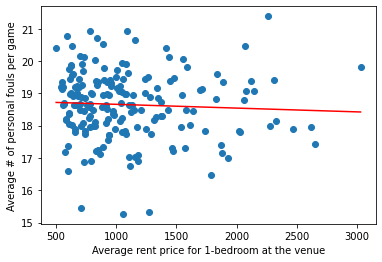

In [ ]:
plt.close()

plt.scatter(x='rent', y='personal_fouls', data=fouls_vs_rent)

z = np.polyfit(x=fouls_vs_rent['rent'], y=fouls_vs_rent['personal_fouls'], deg=1)
p = np.poly1d(z)

plt.plot(fouls_vs_rent['rent'], p(fouls_vs_rent['rent']), 'r')
plt.xlabel('Average rent price for 1-bedroom at the venue')
plt.ylabel('Average # of personal fouls per game')

print("Statistics of plot (slope, p-value):", pearsonr(fouls_vs_rent['rent'], fouls_vs_rent['personal_fouls']))

Figure 10: There is no correlation between the avg. number of personal fouls committed per game and income level in the venue's zip code.

***Hypothesis 4 is invalidated. A correlation does not exist between personal and flagrant fouls committed per game and the venue's zip code income level.***

### 5.5. Impact of a team performance for home games vs away games


Hypothesis 5: A correlation exists between a team’s performance for home games vs away games

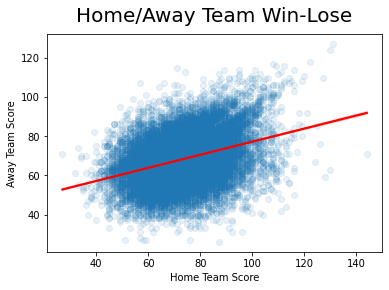

In [ ]:
g = sns.regplot(x="h_points_game", y="a_points_game", data=games_rent_df,scatter_kws={'alpha':0.1},line_kws={"color": "red"})
g.set(xlabel="Home Team Score", ylabel="Away Team Score")
g.set_title("Home/Away Team Win-Lose", fontsize = 20,y = 1.03)

games_rent_df.to_csv('games_rent_df.csv')

Figure 11: Clearly we see that home teams are more likely to win when playing in their home venue.

***Hypothesis 5 is validated. A clear correlation exists and shows that home teams are more likely to outscore and win at home games.***

### 5.6. Impact on home team performance based on attendance

Hypothesis 6: There is an impact on home team performance based on attendance.

We use home team score divided by away team score to calculate winning ratio and compare with how many seats are filled in the game venue

Text(0.5, 1.03, 'Home Team Winning Performance from Local Supporters')

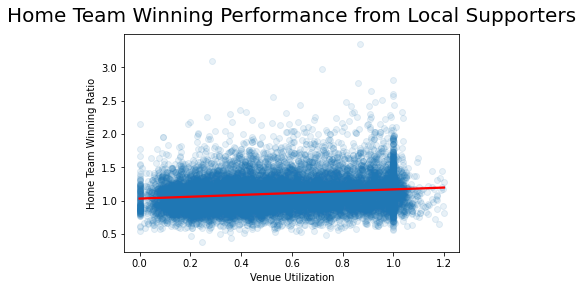

In [ ]:
winning_ratio = games_rent_df["h_points_game"]/games_rent_df["a_points_game"] #creating winning ratio to use in Y-axis of the chart
venue_utilize = games_rent_df["attendance"]/games_rent_df["venue_capacity"] #creating venue utilization to use in X-axis of the chart
g = sns.regplot(x=venue_utilize,y=winning_ratio,scatter_kws={'alpha':0.1},line_kws={"color": "red"})
g.set(xlabel="Venue Utilization", ylabel="Home Team Winning Ratio")
g.set_title("Home Team Winning Performance from Local Supporters", fontsize = 20,y = 1.03)


Figure 12: There is a positive correlation between winning performance and how many supporters attend the game. 

***Hypothesis 6 is validated. We see that as venue utilization increases the home team's win ratio also increases indicating a positive correlation.***

## **6. Summary**


### 6.1. Dashboard


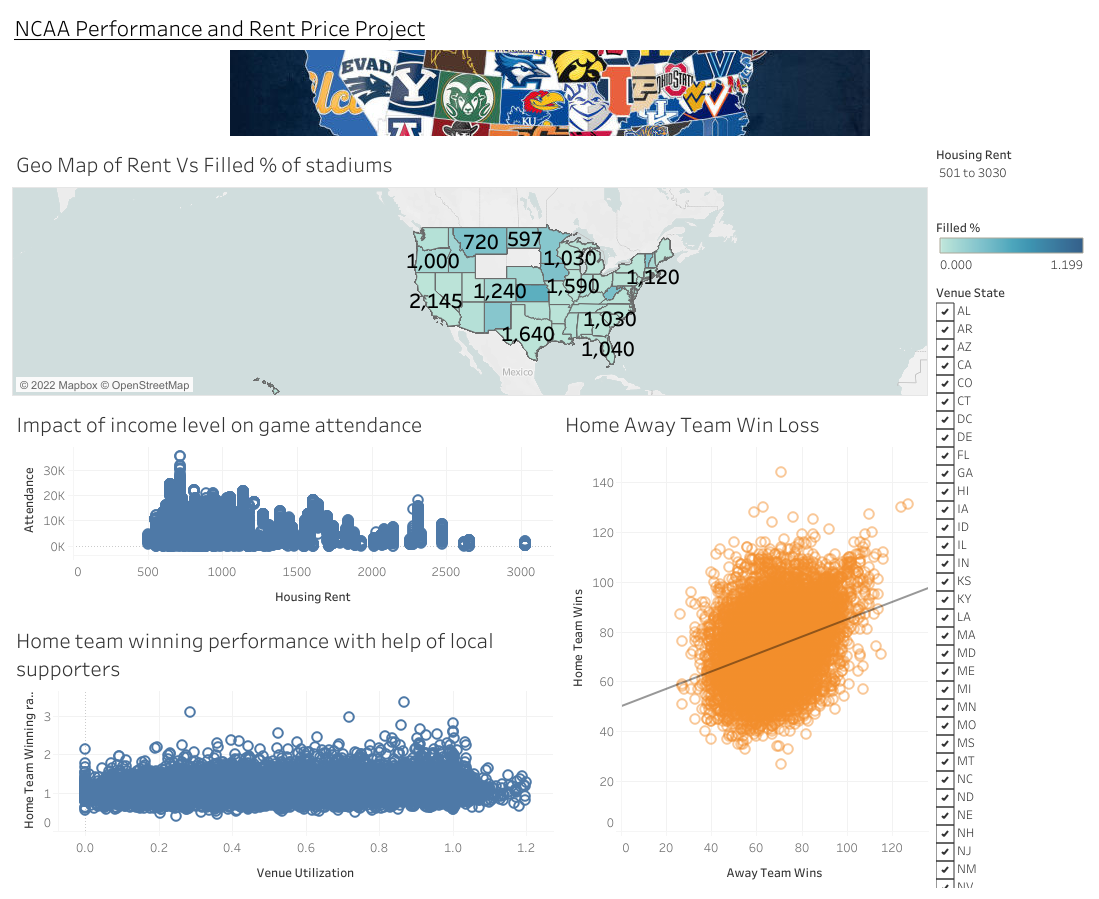

[Link to Dashboard](https://public.tableau.com/app/profile/somesh.yechury/viz/Dataanalytics_16514303832910/Dashboard1?publish=yes)

### 6.2. Conclusion

Our analysis of the NCAA basketball data and rent data has revealed that we cannot conclude that a relationship exists between income level and performance of a team in a game. Hypotheses 1 through 4 are all related to understand the impact of income level on multiple factors of a basketball game. We have reasonably concluded that hypotheses 1 through 4 are all invalidated. Hypotheses 5 and 6 were analysed just to give an extra dimensionality to our analysis. 


*  Hypothesis 1 was invalidated as there is no correlation between income area and win-probability.
*   Hypothesis 2 was invalidated because plots suggested that NCAA basketball games are less popular in high-income areas.
*   Hypothesis 3 was invalidated as a correlation did not exist between personal and flagrant fouls committed per game and the hometown income level.
*   Hypothesis 4 was invalidated as a correlation did not exist between personal and flagrant fouls committed per game and the venue's zip code income level.
*   Hypothesis 5 was validated because a clear correlation exists and shows that home teams are more likely to outscore and win at home games.
*   Hypothesis 6 was validated since we saw that as venue utilization increases the home team's win ratio also increased indicating a positive correlation.

To get a deeper perspective of the relationship between income level and game performance for next steps we focus on data collected over a longer period of time. Data related to funding and budget allocations of teams can be compared against income levels. Examining this relationship between a team's budget/funding with the income levels can help us derive any insights with regard to a team's win%. It is likely that these confounding factors related to budget could have influenced our results and understanding of this project's objective. Additionally, we hypothesize that the relationship between income level and game performance can also be understood by analyzing individual player stats and compare them to the income levels of the zip codes of their high schools where they played basketball prior to playing ball at a college.